In [27]:
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from ObjectDetection import ObjectDetection

In [28]:
def printImgCol(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    
def printImgGray(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

In [29]:
input_path = os.path.join(os.getcwd(), 'images_ros')
img = cv2.imread(input_path + '/image_1_4.png',1)

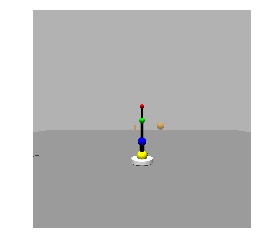

(800, 800, 3)


In [49]:
printImgCol(img)
print(img.shape)

In [50]:
od = ObjectDetection()

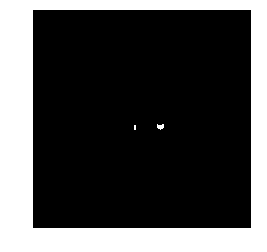

In [51]:
img2 = od.filter_orange(img)
printImgGray(img2)

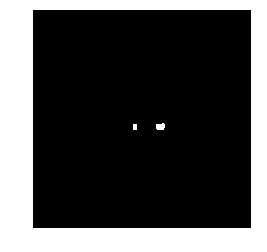

In [52]:
thresh = img2.copy()
#get a kernel
kernel = np.ones((3,3),np.uint8)
thresh = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 1)
img3 = cv2.dilate(thresh, kernel, iterations=3)
printImgGray(img3)

In [38]:
rects, cnts = od.find_boundries(opening)

In [53]:
rects

[(371, 422, 6, 17), (455, 419, 25, 20)]

In [41]:
#thresh = img2.copy()
#get a kernel
#kernel = np.ones((3,3),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
#extract the background from image
sure_bg = cv2.dilate(opening,kernel,iterations = 3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers==-1] = [255,0,0]

In [56]:
cx0, cy0 = od.get_center(img2, rects[0])
cx1, cy1 = od.get_center(img2, rects[1])
print(cx0, cy0)
print(cx1, cy1)

374 431
468 429


In [43]:
#cv2.circle(img2, (cx0, cy0), 1, (125), 1)
#cv2.circle(img2, (cx1, cy1), 1, (125), 1)
#cv2.imwrite('sheep1.jpg', img2)

In [57]:
obj1 = od.get_object(img2, rects[0])
obj2 = od.get_object(img2, rects[1])

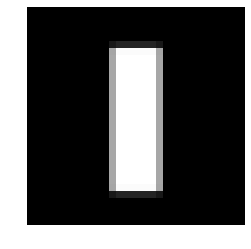

In [58]:
printImgGray(obj1)

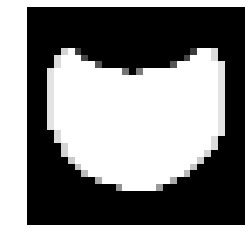

In [59]:
printImgGray(obj2)

In [75]:
area1 = cv2.contourArea(cnts[0])
area2 = cv2.contourArea(cnts[1])
print(area1, area2)

80.0 344.5


In [76]:
perimeter1 = cv2.arcLength(cnts[0],True)
perimeter2 = cv2.arcLength(cnts[1],True)
print(perimeter1, perimeter2)

42.0 78.52691125869751


In [78]:
compactness1 = perimeter1 * perimeter1 / (4.0 * np.pi * area1)
compactness2 = perimeter2 * perimeter2 / (4.0 * np.pi * area2)
print(compactness1, compactness2)

1.7546832475881462 1.424419599022452


In [79]:
M1 = cv2.moments(obj1)
M2 = cv2.moments(obj2)

In [80]:
huM1 = cv2.HuMoments(M1)

In [81]:
huM1

array([[1.06752306e-03],
       [6.98570728e-07],
       [9.91288130e-38],
       [1.60710988e-38],
       [9.96186129e-77],
       [1.78305023e-42],
       [6.33675514e-76]])

In [69]:
hull = cv2.convexHull(cnts[0])
print(hull)

[[[376 438]]

 [[371 438]]

 [[371 422]]

 [[376 422]]]


In [60]:
print(cv2.contourArea(cnts[0]))
print(cv2.contourArea(cnts[1]))

80.0
344.5


In [61]:
print(cv2.isContourConvex(cnts[0]))
print(cv2.isContourConvex(cnts[1]))

True
False


In [62]:
print(cv2.minAreaRect(cnts[0]))
print(cv2.minAreaRect(cnts[1]))

((373.5, 430.0), (16.0, 5.0), -90.0)
((467.18951416015625, 428.79052734375), (24.369558334350586, 18.67667007446289), -2.862405300140381)


In [63]:
print(cv2.arcLength(cnts[0], True))
print(cv2.arcLength(cnts[1], True))

42.0
78.52691125869751


In [64]:
ci1 = np.real(c11)
ci2 = np.real(1000 * c21 * c12)

NameError: name 'c11' is not defined

In [65]:
M1 = cv2.moments(obj1)
M2 = cv2.moments(obj2)

In [66]:
M1["m10"]

614048.0

In [67]:
M1

{'m00': 39616.0,
 'm01': 633856.0,
 'm02': 11635264.0,
 'm03': 233958400.0,
 'm10': 614048.0,
 'm11': 9824768.0,
 'm12': 180346592.0,
 'm20': 9699576.0,
 'm21': 155193216.0,
 'm30': 155980220.0,
 'mu02': 1493568.0,
 'mu03': 0.0,
 'mu11': 0.0,
 'mu12': -3.725290298461914e-09,
 'mu20': 181831.99999999814,
 'mu21': -2.9802322387695312e-08,
 'mu30': 2.9802322387695312e-08,
 'nu02': 0.0009516642481880986,
 'nu03': 0.0,
 'nu11': 0.0,
 'nu12': -1.1925691316001345e-20,
 'nu20': 0.00011585881163531663,
 'nu21': -9.540553052801076e-20,
 'nu30': 9.540553052801076e-20}

In [68]:
M2

{'m00': 107024.0,
 'm01': 1695255.0,
 'm02': 29625505.0,
 'm03': 558463209.0,
 'm10': 1672419.0,
 'm11': 26462044.0,
 'm12': 462327568.0,
 'm20': 31506927.0,
 'm21': 489982594.0,
 'm30': 659993163.0,
 'mu02': 2772747.534151219,
 'mu03': 1356263.6345674992,
 'mu11': -28992.326851919293,
 'mu12': 300745.30153708905,
 'mu20': 5372739.233134624,
 'mu21': -8179508.844430029,
 'mu30': -267392.55289041996,
 'nu02': 0.00024207390192648764,
 'nu03': 3.619438241611851e-07,
 'nu11': -2.5311665056157345e-06,
 'nu12': 8.025939925135205e-08,
 'nu20': 0.00046906540684980077,
 'nu21': -2.182851943720607e-06,
 'nu30': -7.135860660028919e-08}

In [32]:
area = sum(obj1.ravel())
print(area)
perim = bwperim(obj1)
print(perim)
compactness = perim * perim / (4.0 * np.pi * area)
    
c11 = complexmoment(obj1, 1, 1) / np.power(area, 2)
ci1 = np.real(c11)

print(compactness)
print(c11)
print(ci1)

121714
0.0
0.0
(2.507671646134159e-07+0j)
2.507671646134159e-07


In [29]:
def bwperim(img):
    img = np.array(img)
    height, width = np.shape(img)
    perim_img = np.zeros([height, width])
    for row in range(height):
        for col in range(width):
            if row == 0 or row == height - 1 or col == 0 or col == width - 1:
                if img[row][col] == 1:
                    perim_img[row][col] = 1
            else:
                if img[row][col] == 1 and (
                        img[row][col + 1] == 0 or img[row + 1][col + 1] == 0 or img[row + 1][col] == 0 or img[row + 1][
                    col - 1] == 0 or img[row][col - 1] == 0 or img[row - 1][col - 1] == 0 or img[row - 1][col] == 0 or
                        img[row - 1][col + 1] == 0):
                    perim_img[row][col] = 1
    # Uncomment the next two lines if you want to see the perimeter
    # cv2.imshow("perim image",perim_img)
    # cv2.waitKey(5)
    return sum(perim_img.ravel())

In [31]:
# Returns a given complex moment
def complexmoment(img, u, v):
    img = np.array(img)
    indices = np.argwhere(img > 0)
    centre = np.mean(indices, 0)

    momlist = np.zeros(np.shape(indices)[0], dtype=complex)
    for i in indices:
        c1 = i[0] - centre[0] + (i[1] - centre[1]) * 1j
        c2 = i[0] - centre[0] + (centre[1] - i[1]) * 1j
        momlist[i] = np.power(c1, u) * np.power(c2, v)

    return sum(momlist)